# Instacart Grocery Basket Analysis Final Project

Table of Contents:
    
Create Regions Column 
Create a Region, Spending Flag Group
Flag Low Activity Customers and remove them from data set
Create Profiling for Middle Class Young Parent who buy baby items and household goods
Create Crosstabs to analize data
Create Income Flag

In [1]:
#Part 1

#Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Question 1

#Import 4.9 Data Set

orders_products_all = pd.read_pickle(r'C:\Users\Owner\Documents\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_all.pkl')

Question 2

Address Security implications

No single column within our data could trace back to one person. We have names but no email addresses, physical addresses,
or phone numbers. Within a row, I could see a person potentially finding a person using the 1sts 9 columns.

Question 3

In [3]:
#Assign region Northeast

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania','New Jersey']

In [4]:
#Assign Northeast to Regions column

orders_products_all.loc[orders_products_all['STATE'].isin(Northeast), 'Region'] = 'Northeast'

In [5]:
#Assign region Midwest

Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [6]:
#Assign Midwest to Regions column

orders_products_all.loc[orders_products_all['STATE'].isin(Midwest), 'Region'] = 'Midwest'

In [7]:
#Assign region South

South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [8]:
#Assign South to Regions column

orders_products_all.loc[orders_products_all['STATE'].isin(South), 'Region'] = 'South'

In [9]:
#Assign region West

West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
#Assign West to Regions column

orders_products_all.loc[orders_products_all['STATE'].isin(West), 'Region'] = 'West'

In [11]:
orders_products_all.groupby(['Region', 'spending_flag']).size()

Region     spending_flag
Midwest    High Spender       155975
           Low Spender       7441350
Northeast  High Spender       108225
           Low Spender       5614511
South      High Spender       209691
           Low Spender      10582194
West       High Spender       160354
           Low Spender       8132559
dtype: int64

Question 3 Analysis - The most High Spenders are located in the South with 209,691, followed by the West with 160,354, the Midwest with 155975, and finaly Northeast with 108,225.

The most Low Spenders are located in the South with 10,582,194, followed byt the West with 8,132,559, the Midwest with 7,441,350, and finaly the Northeast with 5,614,511.

Question 4 - Exclude low-activity customers from the data 

In [12]:
#Flag Low-Activity Customers

orders_products_all.loc[orders_products_all['max_order'] <5, 'Customer_Activity'] = 'Low Activity Customer'

In [13]:
orders_products_all['Customer_Activity'].value_counts()

Low Activity Customer    1440295
Name: Customer_Activity, dtype: int64

In [14]:
#Drop rows flagged by Low Activity Customers

orders_products_all.shape

(32404859, 33)

In [15]:
orders_products_all_2 = orders_products_all.loc[orders_products_all['max_order'] >=5 ]

In [36]:
#Export Data Set

orders_products_all_2.to_pickle(r'C:\Users\Owner\Documents\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_all_2.pkl')

Question 5 - Create a profiling variable based on age, income, certain goods, and number of dependents 

Middle Class Young Adult Parent, who has a baby(18) and buys household products(17)/ MCYAP_BH

Middle Class = $48,500 - $145,500
Age = 18 to 35
Dependents = 1+
Department ID - Babies (18) and Househould(17)


In [21]:
MCYAP_BH = orders_products_all.loc[(orders_products_all['department_id'].isin([17,18])) & (orders_products_all['Age'] >17) &
                                  (orders_products_all['Age'] < 36) & (orders_products_all['n_dependants'] > 0) & 
                                  (orders_products_all['income'] > 48499) & (orders_products_all['income'] < 145500)] 

Question 6

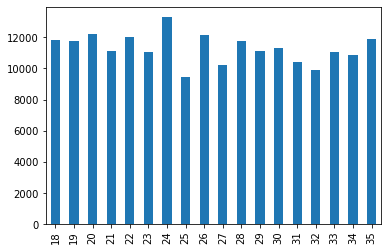

In [75]:
bar_age = MCYAP_BH['Age'].value_counts().sort_index().plot.bar()

In [76]:
bar_age.figure.savefig(r'C:\Users\Owner\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\bar_age_MCYAP_BH.png')

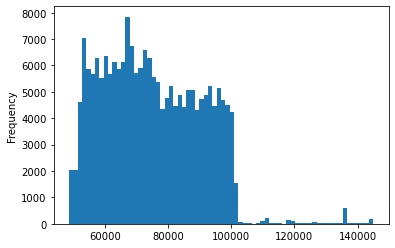

In [79]:
hist_income = MCYAP_BH['income'].plot.hist(bins = 70)

In [80]:
hist_income.figure.savefig(r'C:\Users\Owner\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\hist_income_MCYAP_BH.png')

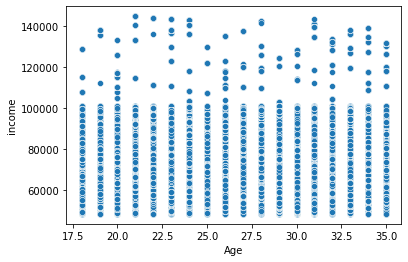

In [91]:
scatter = sns.scatterplot(x = 'Age', y = 'income', data = MCYAP_BH)

In [92]:
scatter.figure.savefig(r'C:\Users\Owner\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\scat_income_vs_age_MCYAP_BH.png')

In [77]:
MCYAP_BH.shape

(203371, 34)

Question 7

In [102]:
MCYAP_BH['Age'].describe()

count    203371.000000
mean         26.353512
std           5.214619
min          18.000000
25%          22.000000
50%          26.000000
75%          31.000000
max          35.000000
Name: Age, dtype: float64

In [103]:
MCYAP_BH['income'].describe()

count    203371.000000
mean      74829.054349
std       15386.416916
min       48502.000000
25%       62213.000000
50%       73228.000000
75%       87100.000000
max      144989.000000
Name: income, dtype: float64

In [105]:
MCYAP_BH['n_dependants'].describe()

count    203371.000000
mean          1.993937
std           0.814131
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: n_dependants, dtype: float64

In [113]:
MCYAP_BH['department_id'].value_counts()

17    126033
18     77338
Name: department_id, dtype: int64

Question 8

In [123]:
MCYAP_BH.groupby(['Region', 'department_id']).size()

Region     department_id
Midwest    17               30055
           18               18318
Northeast  17               22650
           18               14677
South      17               41215
           18               25424
West       17               32113
           18               18919
dtype: int64

In [124]:
MCYAP_BH.groupby(['Region', 'n_dependants']).size()

Region     n_dependants
Midwest    1               17559
           2               15538
           3               15276
Northeast  1               12192
           2               11821
           3               13314
South      1               21075
           2               23872
           3               21692
West       1               17192
           2               17337
           3               16503
dtype: int64

In [134]:
MCYAP_BH.groupby(['Region'])['Age'].agg(pd.Series.mode)

Region
Midwest      20
Northeast    35
South        24
West         26
Name: Age, dtype: int64

In [128]:
MCYAP_BH.groupby('Region').agg({'income' : ['mean']})

,income
,mean
Region,
Midwest,74298.618506
Northeast,75008.481475
South,75520.068398
West,74298.266049


In [69]:
MCYAP_BH['product_name'].value_counts()

100% Recycled Paper Towels                          4887
Sustainably Soft Bath Tissue                        3175
Aluminum Foil                                       1920
Baby Food Stage 2 Blueberry Pear & Purple Carrot    1706
Natural Free & Clear Dish Liquid                    1622
                                                    ... 
Lemon Verbena Air Freshener                            1
Automatic Spray Holder                                 1
Enfagrow Older Toddler Vanilla Milk Drink Powder       1
Scotch Kids 5\" Scissors, Blunted, Red                 1
2nd Foods Applesauce                                   1
Name: product_name, Length: 3759, dtype: int64

In [27]:
MCYAP_BH.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,...,department_id,prices,max_order,loyalty_flag,avg_price,spending_flag,order_freq,order_frequency_flag,Region,Customer_Activity
141,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568,...,17,3.7,9,New Customer,8.375962,Low Spender,7.0,Frequent customer,West,NaN
2555,8794,Amy,Mack,Female,Nebraska,30,1/1/2017,3,married,57096,...,18,6.5,6,New Customer,9.444186,Low Spender,25.0,Non-Frequent Customer,Midwest,NaN
2561,8794,Amy,Mack,Female,Nebraska,30,1/1/2017,3,married,57096,...,18,5.8,6,New Customer,9.444186,Low Spender,25.0,Non-Frequent Customer,Midwest,NaN
2569,8794,Amy,Mack,Female,Nebraska,30,1/1/2017,3,married,57096,...,18,13.5,6,New Customer,9.444186,Low Spender,25.0,Non-Frequent Customer,Midwest,NaN
2570,8794,Amy,Mack,Female,Nebraska,30,1/1/2017,3,married,57096,...,18,13.5,6,New Customer,9.444186,Low Spender,25.0,Non-Frequent Customer,Midwest,NaN


In [135]:
#Export Data Set Profile


MCYAP_BH.to_pickle(r'C:\Users\Owner\Documents\Instacart Basket Analysis\02 Data\Prepared Data\MCYAP_BH.pkl')

In [45]:
crosstab = pd.crosstab(orders_products_all_2['Age'], orders_products_all['income'], dropna = False)

In [44]:
crosstab.to_clipboard()

In [46]:
orders_products_all_2['fam_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

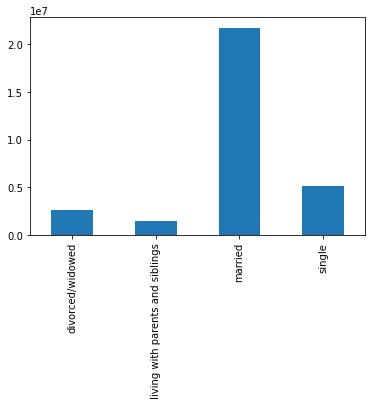

In [55]:
bar_fam_status = orders_products_all_2['fam_status'].value_counts().sort_index().plot.bar()

In [56]:
bar_fam_status.figure.savefig(r'C:\Users\Owner\Documents\Instacart Basket Analysis\04 Analysis\bar_fam_status.png')

In [48]:
#Create income flag

orders_products_all_2.loc[orders_products_all_2['income'] < 53413, 'Class'] = "Lower-Middle Class"

In [49]:
orders_products_all_2.loc[(orders_products_all_2['income'] >= 53413) & (orders_products_all_2['income'] < 106827), 'Class'] = "Middle Class"

In [50]:
orders_products_all_2.loc[orders_products_all_2['income'] >= 106827 , 'Class'] = "Upper-Middle Class"

In [53]:
orders_products_all_2['Class'].value_counts()

Middle Class          14599429
Upper-Middle Class    12342246
Lower-Middle Class     4022889
Name: Class, dtype: int64

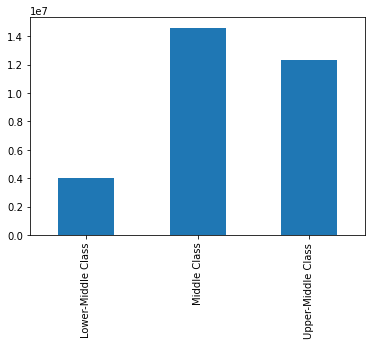

In [58]:
bar_income = orders_products_all_2['Class'].value_counts().sort_index().plot.bar()

In [59]:
bar_income.figure.savefig(r'C:\Users\Owner\Documents\Instacart Basket Analysis\04 Analysis\bar_income_class.png')

In [63]:
orders_products_all_2.groupby(['Region', 'n_dependants']).size()

Region     n_dependants
Midwest    0               1822816
           1               1841417
           2               1809994
           3               1787286
Northeast  0               1354482
           1               1377009
           2               1351961
           3               1381233
South      0               2581933
           1               2539625
           2               2603717
           3               2585864
West       0               1980450
           1               1961055
           2               1967589
           3               2018133
dtype: int64

In [64]:
orders_products_all_2['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64